# **Análise de dados com python de E-Commerce da Olist (empresa atuante nos mais variados marketplaces disponíveis no Brasil)**

Este breve estudo tem o objetivo de analisar informações disponíveis nas bases de dados (região de clientes e vendedores, preços, datas de vendas, comentários dos usuários, etc) e, de forma geral, verificar quais insighs e conclusões podem ser retiradas a partir dos dados disponibilizados.

Os dados utilizados são referentes, no geral, ao período de 2016 a 2020, embora vairem de base para base.

Dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


**ESTA É A PRIMEIRA VERSÃO E ANÁLISE QUE REALIZO. COMO ESTOU APRENDENDO, VOCÊ ANALISTA DE DADOS (OU ATÉ MESMO O PESSOAL DA OLIST) QUE ESTÁ VENDO ESTE ESTUDO, SE ENCONTRAR ERROS OU TER SUGESTÕES DE MELHORIAS, ENTRE EM CONTATO COMIGO, POR GENTILEZA. VAMOS CONVERSAR! QUERO ESTAR EM CONSTANTE EVOLUÇÃO E TODO APRENDIZADO E FEEDBACK É VÁLIDO.**

# **Tratamentos de bases**

## Importando as bases

In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np

In [ ]:
'''
Não serão utilizadas todas as bases disponibilizadas
algumas possuem informações que podem ser encontradas em outras bases
e outras possuem informações de pouca relevância para este estudo;
As bases foram upadas no próprio colab
'''

orders_items = pd.read_csv('/content/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
orders_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/olist_orders_dataset.csv')
products = pd.read_csv('/content/olist_products_dataset.csv')
sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
customers = pd.read_csv('/content/olist_customers_dataset.csv')

### Verificando variáveis (colunas) e registros

verifico os cabeçalhos e principais informações de cada variável (coluna)

In [ ]:
orders_items.head()

data_limite_envio   preco  valor_frete
0        2017-09-19   58.90        13.29
1        2017-05-03  239.90        19.93
2        2018-01-18  199.00        17.87
3        2018-08-15   12.99        12.79
4        2017-02-13  199.90        18.14

In [ ]:
orders_items.shape

(112650, 3)

In [ ]:
order_payments.head()

payment_sequential meio_pagamento  numero_parcelas  valor_parcela
0                   1    credit_card                8          99.33
1                   1    credit_card                1          24.39
2                   1    credit_card                1          65.71
3                   1    credit_card                8         107.78
4                   1    credit_card                2         128.45

In [ ]:
order_payments.shape

(103886, 4)

In [ ]:
orders_reviews.head()

nota titulo_comentario                                         comentario  \
0     4             vazio                                              vazio   
1     5             vazio                                              vazio   
2     5             vazio                                              vazio   
3     5             vazio              Recebi bem antes do prazo estipulado.   
4     5             vazio  Parabéns lojas lannister adorei comprar pela I...   

  data_comentario data_resposta  
0      2018-01-18    2018-01-18  
1      2018-03-10    2018-03-11  
2      2018-02-17    2018-02-18  
3      2017-04-21    2017-04-21  
4      2018-03-01    2018-03-02

In [ ]:
orders_reviews.shape

(99224, 5)

In [ ]:
orders.head()

status_pedido order_purchase_timestamp order_approved_at  \
0     delivered               2017-10-02        2017-10-02   
1     delivered               2018-07-24        2018-07-26   
2     delivered               2018-08-08        2018-08-08   
3     delivered               2017-11-18        2017-11-18   
4     delivered               2018-02-13        2018-02-13   

  order_delivered_carrier_date data_entrega data_estimada_entrega  
0                   2017-10-04   2017-10-10            2017-10-18  
1                   2018-07-26   2018-08-07            2018-08-13  
2                   2018-08-08   2018-08-17            2018-09-04  
3                   2017-11-22   2017-12-02            2017-12-15  
4                   2018-02-14   2018-02-16            2018-02-26

In [ ]:
orders.shape

(99441, 6)

In [ ]:
products.head()

categoria_produto
0             perfumaria
1                  artes
2          esporte_lazer
3                  bebes
4  utilidades_domesticas

In [ ]:
products.shape

(32951, 1)

In [ ]:
sellers.head()

cidade_vendedor estado_vendedor
0           campinas              SP
1         mogi guacu              SP
2     rio de janeiro              RJ
3          sao paulo              SP
4  braganca paulista              SP

In [ ]:
sellers.shape

(3095, 4)

In [ ]:
customers.head()

cidade_cliente estado_cliente
0                 franca             SP
1  sao bernardo do campo             SP
2              sao paulo             SP
3        mogi das cruzes             SP
4               campinas             SP

In [ ]:
customers.shape

(99441, 2)

## Trabalhando com colunas

### Excluindo colunas

Como pode ser percebido, provavelmente as bases fornecedias foram geradas a partir de um banco de dados relacional (verifica-se chaves primárias e estrangeiras), já que possuem muitas colunas de "ids".
Essas não serão necessárias para este estudo.

Ainda, algumas informações da base "products" como dimensões não são úteis para este estudo. Portanto, irei excluí-las.

In [ ]:
#Exclunindo colunas
orders_items.drop(columns=['order_id', 'order_item_id', 'product_id', 'seller_id'], inplace=True)
order_payments.drop(columns=['order_id'], inplace=True)
orders_reviews.drop(columns=['review_id', 'order_id'], inplace=True)
orders.drop(columns=['order_id', 'customer_id'], inplace=True)
products.drop(columns=['product_id', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)
sellers.drop(columns=['seller_id', 'seller_zip_code_prefix'], inplace=True)
customers.drop(columns=['customer_id', 'customer_unique_id', 'customer_zip_code_prefix'], inplace=True)


### Renomeando colunas


Para facilitar o entendimento posterior e apresentação de gráficos, algumas colunas serão renomeadas.

In [ ]:
orders_items.rename(columns={'shipping_limit_date': 'data_limite_envio', 'price': 'preco', 'freight_value': 'valor_frete'}, inplace=True)
order_payments.rename(columns={'payment_type': 'meio_pagamento', 'payment_installments': 'numero_parcelas', 'payment_value': 'valor_parcela'}, inplace=True)
orders_reviews.rename(columns={'review_score': 'nota', 'review_comment_title': 'titulo_comentario', 'review_comment_message': 'comentario', 'review_creation_date': 'data_comentario', 'review_answer_timestamp': 'data_resposta'}, inplace=True)
orders.rename(columns={'order_status': 'status_pedido', 'order_purchase_timestamp	': 'data_compra', 'order_delivered_customer_date': 'data_entrega', 'order_estimated_delivery_date': 'data_estimada_entrega'}, inplace=True)
products.rename(columns={'product_category_name': 'categoria_produto'}, inplace=True)
sellers.rename(columns={'seller_city': 'cidade_vendedor', 'seller_state': 'estado_vendedor'}, inplace=True)
customers.rename(columns={'customer_city': 'cidade_cliente', 'customer_state': 'estado_cliente'}, inplace=True)


## Tratando tipagem dos dados

É importante verificar e deixar a tipagem das variávies corretas, pois podem influenciar em cálculos e apresentação de gráficos.

In [ ]:
orders_items.dtypes

data_limite_envio     object
preco                float64
valor_frete          float64
dtype: object

In [ ]:
order_payments.dtypes

payment_sequential      int64
meio_pagamento         object
numero_parcelas         int64
valor_parcela         float64
dtype: object

In [ ]:
orders_reviews.dtypes

nota                  int64
titulo_comentario    object
comentario           object
data_comentario      object
data_resposta        object
dtype: object

In [ ]:
orders.dtypes

status_pedido                   object
order_purchase_timestamp        object
order_approved_at               object
order_delivered_carrier_date    object
data_entrega                    object
data_estimada_entrega           object
dtype: object

In [ ]:
products.dtypes

categoria_produto    object
dtype: object

In [ ]:
sellers.dtypes

cidade_vendedor    object
estado_vendedor    object
dtype: object

In [ ]:
customers.dtypes

cidade_cliente    object
estado_cliente    object
dtype: object

### Ajustando tipagem de datas

In [ ]:
# As datas serão subtituídas pela tipagem correspondente
# A informação de horário das colunas será perdida, mas nesse caso, essa informação não será utilizada
orders_items['data_limite_envio'] = orders_items['data_limite_envio'].astype('datetime64[D]')
orders_reviews['data_comentario'] = orders_reviews['data_comentario'].astype('datetime64[D]')
orders_reviews['data_resposta'] = orders_reviews['data_resposta'].astype('datetime64[D]')
orders['data_entrega'] = orders['data_entrega'].astype('datetime64[D]')
orders['data_estimada_entrega'] = orders['data_estimada_entrega'].astype('datetime64[D]')
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].astype('datetime64[D]')
orders['order_purchase_timestamp'] = orders['order_purchase_timestamp'].astype('datetime64[D]')
orders['order_approved_at'] = orders['order_approved_at'].astype('datetime64[D]')

## Tratando valores missing (NaN)

Bases com valores em branco (NaN) podem enviesar uma análise estatística de dados. Portanto, é necessário verificar e tratar corretamente tais valores.

In [ ]:
orders_items.isnull().sum()

data_limite_envio    0
preco                0
valor_frete          0
dtype: int64

In [ ]:
order_payments.isnull().sum()

payment_sequential    0
meio_pagamento        0
numero_parcelas       0
valor_parcela         0
dtype: int64

In [ ]:
orders_reviews.isnull().sum()

nota                     0
titulo_comentario    87656
comentario           58247
data_comentario          0
data_resposta            0
dtype: int64

In [ ]:
orders.isnull().sum()

#valores antes da substituição pela moda:
#status_pedido                      0
#order_purchase_timestamp           0
#order_approved_at                160
#order_delivered_carrier_date    1783
#data_entrega                    2965
#data_estimada_entrega              0
#dtype: int64


status_pedido                      0
order_purchase_timestamp           0
order_approved_at                160
order_delivered_carrier_date    1783
data_entrega                    2965
data_estimada_entrega              0
dtype: int64

In [ ]:
products.isnull().sum()

#valores antes da subtituição pela moda:
#categoria_produto    610
#dtype: int64

categoria_produto    610
dtype: int64

In [ ]:
sellers.isnull().sum()

cidade_vendedor    0
estado_vendedor    0
dtype: int64

In [ ]:
customers.isnull().sum()

cidade_cliente    0
estado_cliente    0
dtype: int64

É possível verificar que as bases orders_reviews, orders e products possuem valores NaN. Vamos tratá-los individualmente.

---



### NaN - orders_reviews

In [ ]:
# como é uma base que diz a repeito dos comentários deixados pelos usuários e os dados NaN são strings, vou completar com "vazio"
# assim saberemos os que não apresentaram títulos ou comentários
orders_reviews['titulo_comentario'].fillna('vazio', inplace=True)
orders_reviews['comentario'].fillna('vazio', inplace=True)

### NaN - orders (datas)

In [ ]:
#verificando a % do total de valores missing (NaN) para cada coluna
perc_NaN = round((orders.isnull().sum() / orders.count())*100, 3)
perc_NaN

#valores de % total antes da substituição
#status_pedido                   0.000
#order_purchase_timestamp        0.000
#order_approved_at               0.161
#order_delivered_carrier_date    1.826
#data_entrega                    3.073
#data_estimada_entrega           0.000
#dtype: float64


status_pedido                   0.000
order_purchase_timestamp        0.000
order_approved_at               0.161
order_delivered_carrier_date    1.826
data_entrega                    3.073
data_estimada_entrega           0.000
dtype: float64

É possível verificar que o percentual de valores NaN nas colunas em que existem, possuem uma porcentagem baixa em relação ao total de registros. Para não continuar com vazios, serão subtituídos por suas respectivas modas. Devido a esse baixo valor, essa troca terá pouca força de influência sobre a análise.


In [ ]:
orders['data_entrega'].mode()

0   2018-08-27
Name: data_entrega, dtype: datetime64[ns]

In [ ]:
orders['order_delivered_carrier_date'].mode()

0   2017-11-28
Name: order_delivered_carrier_date, dtype: datetime64[ns]

In [ ]:
orders['order_approved_at'].mode()

0   2018-04-24
Name: order_approved_at, dtype: datetime64[ns]

In [ ]:
orders['data_estimada_entrega'].mode()

0   2017-12-20
Name: data_estimada_entrega, dtype: datetime64[ns]

In [ ]:
# Substituindo valores NaN em cada coluna por suas respectivas moda
orders['data_entrega'].fillna('2018-08-27', inplace=True)
orders['order_delivered_carrier_date'].fillna('2017-11-28', inplace=True)
orders['order_approved_at'].fillna('2018-04-24', inplace=True)
orders['data_estimada_entrega'].fillna('2018-04-24', inplace=True)


### NaN - products

In [ ]:
perc_NaN = round((products.isnull().sum() / products.categoria_produto.count())*100, 3)
perc_NaN

#valores de % total antes da substituição
#categoria_produto    1.886
#dtype: float64

categoria_produto    1.886
dtype: float64

Da mesma forma que a tabela tratada anteriormente (que possuia tipagem de data), a coluna categoria_produto possui tipagem de texto (object), não necessitando de uma análise estatística mais profunda para substituição. Ainda, os valores NaN são baixos como anteriormente, correspondendo a menos de 2% do total. Serão substituidos pela moda.

In [ ]:
products['categoria_produto'].mode()

0    cama_mesa_banho
Name: categoria_produto, dtype: object

In [ ]:
# Substituindo valores NaN
products['categoria_produto'].fillna('cama_mesa_banho', inplace=True)

# **E o que os dados dizem? Dados tratados, bora analisar!**

## Base - orders_items

In [ ]:
orders_items.data_limite_envio.describe()

<ipython-input-118-0728f8ce1010>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                  112650
unique                    555
top       2017-11-30 00:00:00
freq                     1647
first     2016-09-19 00:00:00
last      2020-04-09 00:00:00
Name: data_limite_envio, dtype: object

In [ ]:
# Preço médio dos pedidos
round(orders_items.preco.mean(), 2)

120.65

In [ ]:
# Preço médio do frete
pm_frete = round(orders_items.valor_frete.mean(), 2)
pm_frete

19.99

In [ ]:
orders_items.valor_frete.describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: valor_frete, dtype: float64

In [ ]:
#histograma (plotly) valor do frete
import plotly.express as px
hist = px.histogram(orders_items, x = 'valor_frete', nbins=60)
hist.update_layout(width=800, height=500, title_text='Distribuição do valor do frete')
hist.show()

In [ ]:
orders_items.preco.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: preco, dtype: float64

Sendo a média uma medida de centralidade altamente influenciada pela distribuição dos dados (preços) e por estar consideralmente distante da mediana, é possível verificar (antes mesmo de plotar o gráfico de distriuição/histograma) que haverá grande número de outliers e que a maioria dos valores estão concentrados abaixo de R$ 134,90.

Serão plotados o gráfico de distribuição e boxplot do preço na sequência.

In [ ]:
#histograma (seaborn) valor do preco
#import seaborn as pd
#fig, ax = plt.subplots(figsize=(10,6))
#sb.histplot(orders_items, x = 'preco', bins=50, color='blue', kde=True, stat='count')
#ax.set_title('Distribuição por preco', fontdict={'fontsize': 15})
#ax.set_xlabel('Preco', fontdict={'fontsize': 15})

#histograma (plotly) do preco
import plotly.express as px
hist1 = px.histogram(orders_items, x = 'preco', nbins=50)
hist1.update_layout(width=800, height=500, title_text='Distribuição do preço dos pedidos')
hist1.show()

In [ ]:
import plotly.express as px
box = px.box(orders_items, y='preco')
box.show()

#boxplot com seaborn (não fica muito visual devido ao grande número de outliers e pouca iteratividade)
#import seaborn as sb
#sb.boxplot(y='preco', data=orders_items, color='red')

In [ ]:
#verificar a distribuição sem outliers
preco_sem_outliers = orders_items.loc[orders_items['preco'] < 219]

import plotly.express as px
box = px.box(preco_sem_outliers, y='preco')
box.show()


In [ ]:
preco_sem_outliers.preco.describe()
#desconsiderando os outliers,

count    100291.000000
mean         77.768050
std          50.338349
min           0.850000
25%          37.000000
50%          65.000000
75%         109.900000
max         218.990000
Name: preco, dtype: float64

Dos 112k de registros de preço, mais ou menos 100k estão abaixo de R$ 219,00.
Naturalmente, a maioria das pessoas realizam compras de bens de baixo valor, com uma média por pedido de RS 77,77.

In [ ]:
#Valor médio dos preços dos pedidos por ano
orders_items['data_limite_envio_ano'] = orders_items['data_limite_envio'].dt.year
orders_items_datas = orders_items.set_index('data_limite_envio')
ts = orders_items_datas['preco']
ts_ano = ts.resample('A').mean()

import plotly.express as px
linha = px.line(ts_ano)
linha.show()

#Gráfico com matplolib
#import matplotlib.pyplot as plt
#plt.plot(ts_ano, color='purple', marker='o')
#plt.title('Gráfico de linhas 2')
#plt.show()

In [ ]:
#Valor médio do frete dos pedidos por ano
orders_items_datas.index
ts1 = orders_items_datas['valor_frete']
ts1_ano = ts1.resample('A').mean()

import plotly.express as px
linha = px.line(ts1_ano)
linha.show()

In [ ]:
#Valor médio do frete dos pedidos por ano
orders_items_datas.index
ts1 = orders_items_datas['preco']
ts1_ano = ts1.resample('A').mean()

import plotly.express as px
linha = px.line(ts1_ano)
linha.show()

### Conclusão

Entre setembro/2016 a abril/2020:
- É possível verificar que os produtos possuem um preço medio de R$ 120,65;

- Um valor médio de frete de RS 19,99 sendo a maioria entre R$ 10 e 29,99;


Anual:

- O valor médio do frete não variou muito, ficando perto da casa dos R$ 20;
- Houve queda, entretanto pequena, na média dos preços dos pedidos entre jan/2017 até jan/2019;




## Base - order_payments

In [ ]:
#Fazendo a contagem da maioria dos meios de pagamentos
order_payments['meio_pagamento'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: meio_pagamento, dtype: int64

In [ ]:
#Verificando os meios de pagamentos mais utilizados
import plotly.express as px
pizza = px.pie(order_payments, 'meio_pagamento')
pizza.update_layout(title_text='Meios de pagamentos')
pizza.show()

### Conclusão

Os meios de pagamentos mais utilizados é cartão de crédito, com quase 74%. Em seguida, boleto, com 19%, é o segundo meio de pagamentos mais utilizado.

PS. Como os dados são de antes de 2021, ano em que o pix foi implementado, é natural que o cartão de crédito fosse o meio de pagamento mais utilizado online. Atualmente (2023), acredito que a taxa de uso do cartão de crédito ainda seja a maioria, mas vem perdendo espaço para o pix.

## Base - orders_reviews

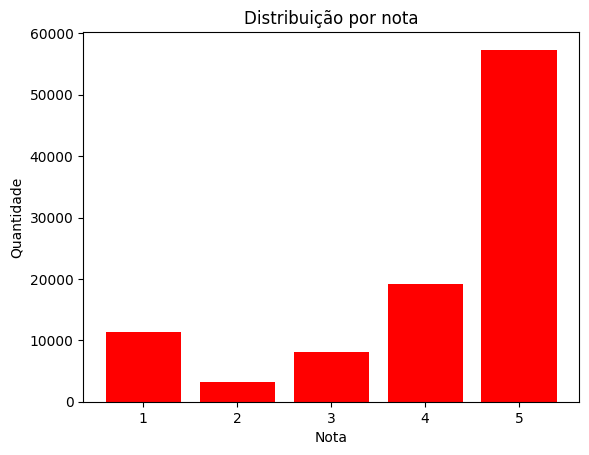

In [ ]:
# Verificando as maiores notas
import matplotlib.pyplot as plt
nota = orders_reviews.nota.value_counts()
plt.bar(nota.index, nota, color='red')
plt.title('Distribuição por nota')
plt.ylabel('Quantidade')
plt.xlabel('Nota')
plt.show()

In [ ]:
import plotly.express as px
pizza1 = px.pie(orders_reviews, 'nota')
pizza1.update_layout(title_text='Notas')
pizza1.show()

57,8% dos usuários deram nota 5 em seus comentários, seguido de 19,3% de nota 4.

Isso significa que a base de clientes é composta por 77,1% de compradoresp romoteres e 14,7% de detratores.

In [ ]:
#pip install wordccloud
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#Criando uma nuvem de palavras para verificar as palavras que os usuários mais mencionaram

#pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#no conjunto abaixo, crio uma variável (resumo) em que conterá somente a coluna
# 'comentario' da base. Em seguida, junto todos os registros em uma string separando
# por espaço(" ") e por fim, seto as stopwords que não quero que apareça no gráfico.

resumo = orders_reviews.dropna(subset=['comentario'], axis=0)['comentario']
textos = " ".join(i for i in resumo)

stopwords = set(STOPWORDS)
stopwords.update(['vazio', 'da', 'de', 'e', 'meu', 'em', 'no', 'ao', 'aos', 'é'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1600, height=800).generate(textos)

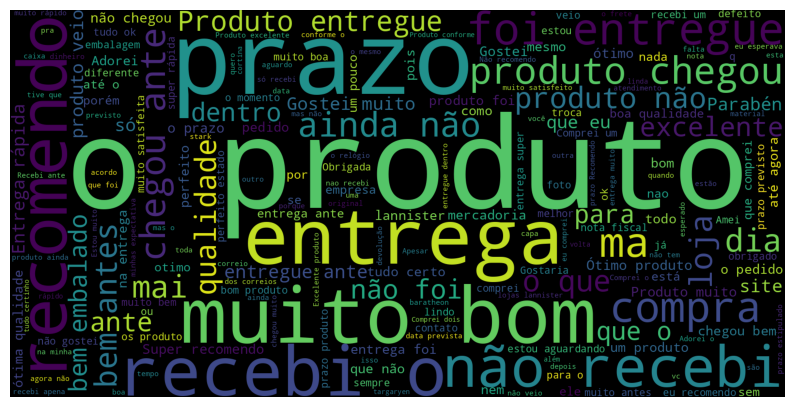

In [ ]:
#plotando o gráfico nuvem de palavras
#quanto maior a palavra, mais vezes ela foi mencionada
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

As palavras "produto", "prazo" e "entrega" foram as palavras mais usadas pelos usários. Ainda, palavras como "qualidade" e "muito bom" indicam que a maioria dos usuários ficaram satisfeitos com os serviços oferecidos (produto comprado e entrega).
Essa alegação pode ser confirmada não somente pela nuvem de palavras, mas também pela al quantidade de promotores, como visto anteriormente.

A data dos comentários compreende-se entre out/2016 a ago/2018.

### Conclusão

Dente o período em que ocorreram os comentários, a Olist foi capaz de gerar uma boa impressão aos clientes, garantindo bons prazos de entregas (segundo a maioria e a nuvem de palavras) e um bom nível geral de serviço, uma vez que a grande maioria dos usuários foram promotores da marca (77,1%).

## Base - Orders

In [ ]:
#status do pedido em valores absolutos
status = orders.status_pedido.value_counts()
status

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: status_pedido, dtype: int64

In [ ]:
# Verificando os status de entrega
import plotly.express as px
pizza1 = px.pie(orders, 'status_pedido')
pizza1.update_layout(title_text='Status do pedido')
pizza1.show()

In [ ]:
#intervalo das datas de entrega
orders.data_entrega.describe()

<ipython-input-140-55e0cb7cda24>:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                   99441
unique                    645
top       2018-08-27 00:00:00
freq                     3411
first     2016-10-11 00:00:00
last      2018-10-17 00:00:00
Name: data_entrega, dtype: object

As datas de entrega compreenderam-se entre out/2016 a out/2018.

### Conclusão

Pedido efetuado é pedido entregue! Naturalmente, uma empresa comprometida com os clientes, entrega os produtos comprados. Com a Olist não foi diferente, no período analisado, 97% da entregas foram efetudas.

Assim como na estatística, é impossível controlar 100% das entregas e houveram variabilidades. Entre as ocorridas, destacaram-se "shipped"/despachado (1,1%) e cancelados (0,7%).

## Base - products

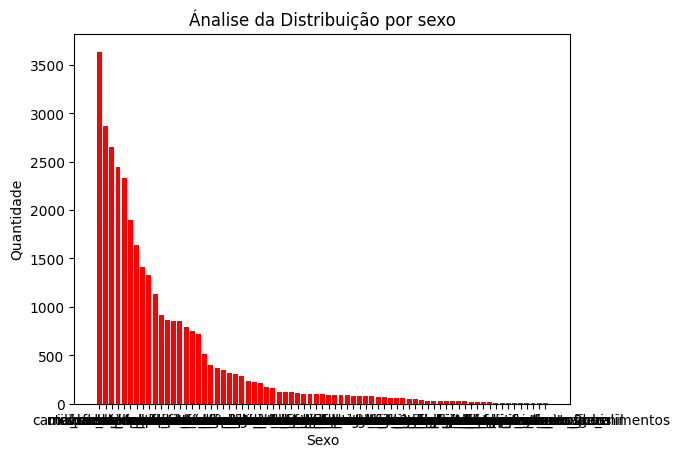

In [ ]:
#verificar as categorias mais comuns dos produtos pedidos
top10 = (products['categoria_produto'].value_counts())
#plotando o gráfico de barras
plt.bar(top10.index, top10, color='red')
plt.title('Ánalise da Distribuição por sexo')
plt.ylabel('Quantidade')
plt.xlabel('Sexo')
plt.show()

#df_top10 = pd.DataFrame(top10, columns=['teste'])
#df_top10

Como existem muitas categorias de produtos (73 no total), vamos mostrar somente as 10 mais maiores.

In [ ]:
#como há muitas categorias de produtos, vou rankear entre os 10 maiores
#como a coluna categoria_produto é um object, não posso usar o método nlargest
#para rankear
#usarei outra alternativa

top10 = (products['categoria_produto'].value_counts())
teste = top10.index
n = list((products['categoria_produto'].value_counts()))
df_teste = pd.DataFrame(teste, columns=['categoria'])
df = pd.concat([df_teste, pd.DataFrame(n, columns=['valores_produtos'])], axis=1)
#df.shape
#(73, 2)
df_mod = df.drop(range(10,73), axis=0)

In [ ]:
#plotando o gráfico de barras com top 10 categorias

import plotly.express as px
px.bar(df_mod, x='categoria', y='valores_produtos')

#gráfico top10 em matplotlib
#import matplotlib.pyplot as plt
#plt.figure(figsize=(12,6))
#plt.bar(df_mod.categoria, df_mod.valores_produtos, width=0.5)
#plt.title("Top 10 maiores categorias")
#plt.xticks(rotation=90)
#plt.show()

In [ ]:
#encontrando o % que cada categoria representa do total
perc_cat = round((products.categoria_produto.value_counts(normalize=True))*100, 2)
perc_cat

cama_mesa_banho                  11.04
esporte_lazer                     8.70
moveis_decoracao                  8.06
beleza_saude                      7.42
utilidades_domesticas             7.09
                                 ...  
fashion_roupa_infanto_juvenil     0.02
casa_conforto_2                   0.02
pc_gamer                          0.01
seguros_e_servicos                0.01
cds_dvds_musicais                 0.00
Name: categoria_produto, Length: 73, dtype: float64

### Conclusão

Há muitas categorias de produtos com que a Olist atua. Devido a isso, foi rankeado as 10 categorias de produtos mais pedidos.

No top 3 mais pedidos estão:
 - cama_mesa_banho, com 3639 pedidos;
 - esporte_lazer, com 2867 pedidos;
 - moveis_decoracao, com 2657 pedidos.

Esses valores correspondem, respectivamente a 11%, 8,7% e 8,6% do total de pedidos realizados (32951).

## Base - sellers

In [ ]:
#Gráfico do estado dos vendedores

#gráfico em seabron
#import seaborn as pb
#sb.countplot(y='estado_vendedor', data=sellers)

agrupado = sellers.groupby(['estado_vendedor']).count().reset_index()
agrupado = agrupado.sort_values('cidade_vendedor', ascending=False)
agrupado

import plotly.express as px
px.bar(agrupado, x='estado_vendedor', y='cidade_vendedor')


In [ ]:
#encontrando o % de cada estado do vendedor perante o total
perc_sel = round((sellers['estado_vendedor'].value_counts(normalize=True))*100, 2)
perc_sel

SP    59.74
PR    11.28
MG     7.88
SC     6.14
RJ     5.53
RS     4.17
GO     1.29
DF     0.97
ES     0.74
BA     0.61
CE     0.42
PE     0.29
PB     0.19
RN     0.16
MS     0.16
MT     0.13
RO     0.06
SE     0.06
PI     0.03
AC     0.03
MA     0.03
AM     0.03
PA     0.03
Name: estado_vendedor, dtype: float64

### Conclusão

A maioria dos vendedores que atuam pela Olist pertencem ao estado de São Paulo (59,7%), Paraná (11,3%) e Minas Gerais (7,9%).

Portanto, mais da metade dos vendedores atuam em SP, sendo as regiões sudeste e sul as mais presentes.

## Base - customers

In [ ]:
#Gráfico do estado dos clientes

#gráfico em seaborn
#import seaborn as pb
#sb.countplot(y='estado_cliente', data=customer)

agrupado1 = customers.groupby(['estado_cliente']).count().reset_index()
agrupado1 = agrupado1.sort_values('cidade_cliente', ascending=False)
agrupado

import plotly.express as px
px.bar(agrupado1, x='estado_cliente', y='cidade_cliente')


In [ ]:
#encontrando a % de cada estado do vendedor perante o total
perc_clientes = round((customers['estado_cliente'].value_counts(normalize=True))*100, 2)
perc_clientes

SP    41.98
RJ    12.92
MG    11.70
RS     5.50
PR     5.07
SC     3.66
BA     3.40
DF     2.15
ES     2.04
GO     2.03
PE     1.66
CE     1.34
PA     0.98
MT     0.91
MA     0.75
MS     0.72
PB     0.54
PI     0.50
RN     0.49
AL     0.42
SE     0.35
TO     0.28
RO     0.25
AM     0.15
AC     0.08
AP     0.07
RR     0.05
Name: estado_cliente, dtype: float64

### Conclusão

Os clientes apresentaram uma divisão regional bem definida:

- Em primeiro lugar, a regigão sudeste apresentou os maiores valores: São Paulo (42%), Rio de Janeiro (12,9%) e Minas Gerias (11,7%, totalizando **66,7%**;
- sengundo lugar, a região sul apresentou: Rio Grande do Sul (5,5%), Paraná (5,1%) e Santa Catarina (3,6%), totalizando **14,2%**.

# **Conclusão Final**

Durante todo o período analisado, os preços médios dos pedidos não variou muito ao longo dos anos, ficando entre R$ 120 e 135,00, sendo 75% do total dos pedidos abaixo desse último valor mencionado. Como o valor médio dos pedidos foi baixo, o valor médio do frete também foi, ficando em torno de RS 20,00.


Por se tratar de ecommerce, naturalmente, a maioria dos pedidos foram efetuados por meio de cartão de crédito (74%), seguido de boleto (19%). Acredito que se a base estivesse atualizada até esse ano (2023), o surgimento de pix como meio de pagamento provavelmente estaria entre os três primeiros lugares, uma vez que, foi grandemente aceito e possui uma grande facilidade e agilidade em relação ao boleto.


No geral, os pedidos geraram uma boa nota formando uma maioria de clientes promotores da marca (notas 5 e 4), atingindo um percentual de 77,1% e 14,7% de detratores (notas 1 e 2). Na nuvem de palavras, foi possível encontrar entre as palavras mais frequentes, palavras como "produto", "prazo" e "entrega", que foram usadas em comentários de elogios, o que faz sentido, já que 97% dos pedidos foram entregues. Ainda, palavras como "qualidade" e "muito bom" indicaram que a maioria dos usuários ficaram satisfeitos com os serviços oferecidos (pedidos realizados e entrega). Ainda sobre entregas, entre 3% de não entregues, "shipped"/despachado (1,1%) obteu a maior porcentagem, seguido de cancelados (0,7%).

Dentre os mais de 100k de pedidos realizados na base, as três principais categorias de produtos foram:

  - cama_mesa_banho, com 11,0%;
  - esporte_lazer, com 8,7%;
  - moveis_decoracao, com 8,6%;

A partir desses dados e atrelado com os baixos valores da maioria dos pedidos, é possível concluir que os clientes normalmente realizam pequenas compra como toalhas para banho, leçóis para cama e utensílios para casa de modo geral.

Acerca dos vendedores e clientes, a maioria está concentrada nas regiões sudeste e sul, respectivamente. Entre os vendedores, quase 60% estão concentrados no estado de São Paulo. Entre os clientes, 42% estão em São Paulo e 12,9% no Rio de Janeiro.

Por fim, (acedito que a Olist tenha esse dado, somente não o disponibilizou nessas bases) mas um dado faltante e extremamente interessante que poderia ter, é a **segmentação dos dados por marketplace/plataforma de vendas**. Assim ,seria possível utilizar todo o potencial dos dados disponibilizados para verificar qual plataforma está permitindo o maior número de vendas/pedidos, o maior ticket médio, a maior taxa de elogios/reclamações entre os usuários ou que possuem as taxas de entregas mais eficientes (embora esse dado parte mais da transportadora responsável) ou até mesmo, verificar qualis produtos e categorias performam melhor em cada plataforma. Seria possível ter uma visão dinâmica de como anda o negócio em cada plataforma, permitindo estratégias e ações mais específicas e assertivas, alavancando mais ainda a grande performance que a Olist já é capaz de trazer.







